In [1]:
import os
os.chdir('..')

In [2]:
import torch
import numpy as np
from gnn_library.util import load
from evaluate import evaluate_model
from instance_generator import sample_instances
from params import *
from util import _box_plots

%load_ext autoreload
%autoreload 2

In [17]:
device = torch.device('cuda:5' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

GNN, args = load('GNN2_hyperparam_tuned', device)
# GNN, args = load('GNN2_large_training_set', device)
# GNN, args = load('GNN1_large_training_set', device)

PyTorch has version 1.12.0+cu102
Using device: cuda:5


## Box plot baseline evaluation

#### Evaluate CRs on all graph configurations

In [18]:
rng = np.random.default_rng(seed=0)
num_trials = 40
batch_size = 500
node_configs = EXPERIMENT_BASE_TESTING_REGIMES
graph_configs = MAIN_TESTING_GRAPH_CONFIGS
baselines_kwargs = {
    'greedy': {},
    'greedy_t': {'threshold': 0.35},
    'lp_rounding': {}
}

data = {node_config: {} for node_config in node_configs}

for node_config in node_configs:
    for graph_config in graph_configs:
            print(node_config, graph_config)
            instances = sample_instances(
                *node_config,
                num_trials,
                rng,
                args.__dict__,
                **graph_config
            )

            cr_ratios, _ = evaluate_model(
                meta_model=None,
                meta_model_type=None,
                base_models=[GNN],
                instances=instances,
                batch_size=batch_size,
                rng=rng,
                num_realizations=5,
                baselines=['greedy', 'greedy_t', 'lp_rounding'],
                **baselines_kwargs
            )

            data[node_config][str(graph_config)] = cr_ratios


(30, 10) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}


/home/alexhay/GNN-OBM/algorithms.py:263: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom_matrix


(30, 10) {'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}
(30, 10) {'graph_type': 'OSMNX', 'location': 'Fremont, California, USA'}
(30, 10) {'graph_type': 'GM'}


#### GNN2

In [19]:
results = {}
for graph_type, val in data[EXPERIMENT_BASE_TESTING_REGIMES[0]].items():
	results[graph_type] = np.mean(val['learned'])
results

{"{'graph_type': 'ER', 'p': 0.5, 'weighted': True}": 0.9534425971930774,
 "{'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}": 0.9461678796438854,
 "{'graph_type': 'OSMNX', 'location': 'Fremont, California, USA'}": 0.9488966980153659,
 "{'graph_type': 'GM'}": 0.940550100013542}

#### GNN 2 large training set

In [16]:
results = {}
for graph_type, val in data[EXPERIMENT_BASE_TESTING_REGIMES[0]].items():
	results[graph_type] = np.mean(val['learned'])
results

{"{'graph_type': 'ER', 'p': 0.5, 'weighted': True}": 0.9455001367937683,
 "{'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}": 0.9443118921917637,
 "{'graph_type': 'OSMNX', 'location': 'Fremont, California, USA'}": 0.9258132603233659,
 "{'graph_type': 'GM'}": 0.9357342911739787}

#### GNN 1 large training set

In [13]:
results = {}
for graph_type, val in data[EXPERIMENT_BASE_TESTING_REGIMES[0]].items():
	results[graph_type] = np.mean(val['learned'])
results

{"{'graph_type': 'ER', 'p': 0.5, 'weighted': True}": 0.9629955813173965,
 "{'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}": 0.9461311475561548,
 "{'graph_type': 'OSMNX', 'location': 'Fremont, California, USA'}": 0.9567308651945122,
 "{'graph_type': 'GM'}": 0.9443040266648147}

#### Generate box plots

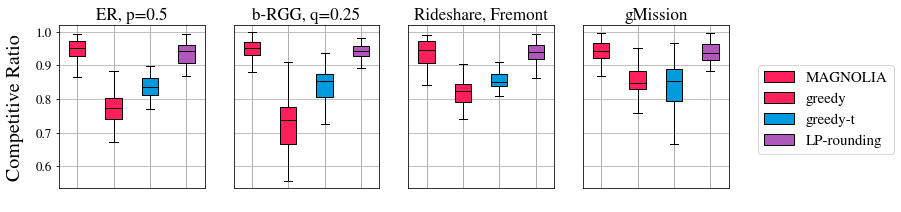

In [6]:
# RESULTS FOR LARGE TRAINING SET, GNN2
results = {}
for graph_type, val in data[EXPERIMENT_BASE_TESTING_REGIMES[0]].items():
	results[graph_type] = val

_box_plots(results, lambda graph_type: f"GNN2_classify_{graph_type} {node_config[1]}x{node_config[0]}")

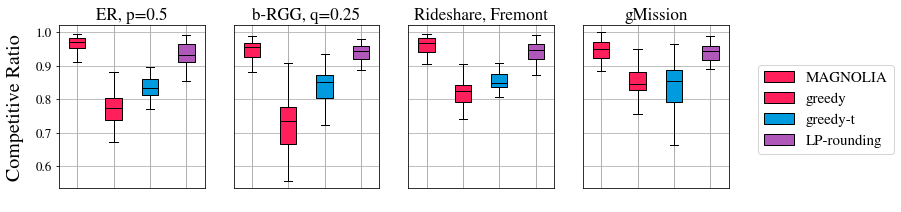

In [13]:
# RESULTS FOR LARGE TRAINING SET, GNN1
results = {}
for graph_type, val in data[EXPERIMENT_BASE_TESTING_REGIMES[0]].items():
	results[graph_type] = val

_box_plots(results, lambda graph_type: f"GNN2_classify_{graph_type} {node_config[1]}x{node_config[0]}")

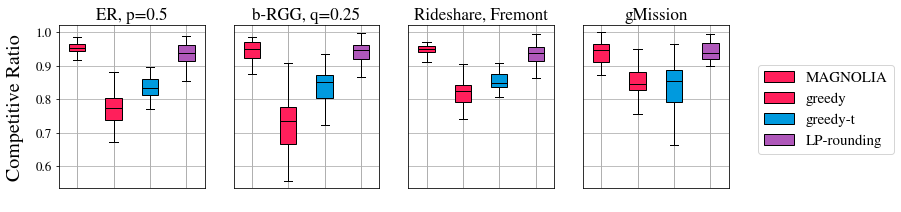

In [9]:
# RESULTS FOR NORMAL TRAINING SET
results = {}
for graph_type, val in data[EXPERIMENT_BASE_TESTING_REGIMES[0]].items():
	results[graph_type] = val

_box_plots(results, lambda graph_type: f"GNN2_classify_{graph_type} {node_config[1]}x{node_config[0]}")